## 1. Prepare the Data

### 1) Install additional packages required to run the code

In [21]:
ssc install qreg2    , replace
ssc install coefplot , replace


checking qreg2 consistency and verifying not already installed...
all files already exist and are up to date.

checking coefplot consistency and verifying not already installed...
all files already exist and are up to date.


### 2) Load data

In [22]:
use "https://raw.githubusercontent.com/worldbank/Stata-IE-Visual-Library/develop/Library/Regression%20coefficients/Quantile%20treatment%20effect/data.dta", clear

(Student Standardized Test Scores)


### 3) Generate dummies for strata (factor variables do not work in 'qreg2')

In [23]:
tab school_strata, gen(school_strata_)


     Strata |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |      2,196       48.68       48.68
          2 |      1,420       31.48       80.16
          3 |        702       15.56       95.72
          4 |        193        4.28      100.00
------------+-----------------------------------
      Total |      4,511      100.00


## 2. Estimate Coefficients

### 1) Define regression options

In [24]:
local quantileInterval = 0.1
local statSignLevel    = 90

### 2) Initiate locals (to be filled in the next loop)

In [25]:
local quantileLabels   = ""     //x-axis label
local modelsList       = ""     //estimates name
local quantileCount    = 1      //count of quantile regression

### 3) Setting quantiles

In [26]:
forv  quantile = `quantileInterval'(`quantileInterval')`=1-`quantileInterval'' {
    local roundQuantile =  round(real(string(`quantile'*100, "%4.0f")),10)/100                // This is needed, otherwise Stata gives issue with the last numbers of the sequence and with roundin
    local integerQuantile = `roundQuantile'*100
    eststo est_q`integerQuantile': qui qreg2 student_average_std school_treated school_strata_*, ///
    q(`roundQuantile') cl(school_id)                                                          // Store estimates from quantile regression with fixed effects and clustered standard errors
    local  quantileLabels `"`quantileLabels' `quantileCount++' "Q{sub:`integerQuantile'} " "' // Add these estimate to locals
    local  modelsList `"`modelsList' est_q`integerQuantile' || "'
}

## 3. Plot Graph

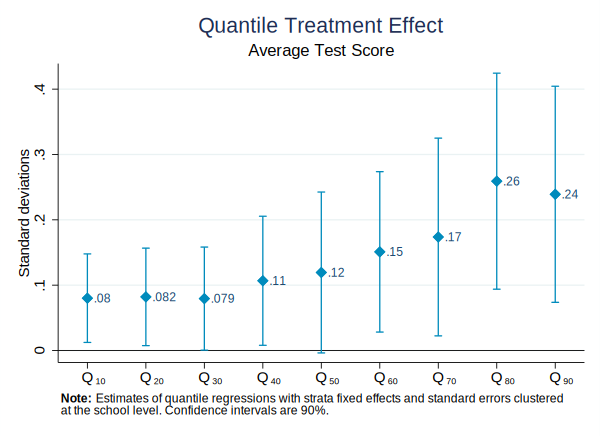

In [27]:
coefplot `modelsList', keep(*school_treated*) vertical bycoefs mlab format(%9.2g) msymbol(diamond) mcolor(ebblue) ///
         levels(`statSignLevel')                ///
         ciopts(recast(rcap) lcolor(ebblue))    ///
         title("Quantile Treatment Effect")     ///
         subtitle("Average Test Score")         ///
         ytitle("Standard deviations")          ///
         yline(0, lstyle(foreground))           ///
         xlab(none) xlab(`quantileLabels', add) ///
         note("{bf:Note:} Estimates of quantile regressions with strata fixed effects and standard errors clustered" "at the school level. Confidence intervals are `statSignLevel'%.") ///
         legend(off) graphregion(color(white))

## 4. Store graph in .png format

In [ ]:
gr export "figure.png", width(5000) replace